<a href="https://colab.research.google.com/github/herysedra/ady_cov/blob/master/scr/fitaovana/kajy_tsotra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pymc3 as pm
import theano.tensor as tt
import theano
import datetime
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import pickle

from numpy import log,exp
from numpy.random import multinomial

from scipy.stats import uniform, gamma, poisson

In [0]:
a = [3]*4
a

[3, 3, 3, 3]

In [0]:
num_days = 5

a = tt.ones(num_days-1)
b = np.array(a)
b

array(Alloc.0, dtype=object)

In [0]:
print(tt.ones(num_days-1))

In [0]:
type(tt.ones(num_days-1))

theano.tensor.var.TensorVariable

In [0]:
tt.ones(num_days-1).shape

Shape.0

In [0]:
2*tt.ones(num_days-1)

Elemwise{mul,no_inplace}.0

In [0]:
print(2*tt.ones(num_days-1))

Elemwise{mul,no_inplace}.0


In [0]:
type(2*tt.ones(num_days-1))

theano.tensor.var.TensorVariable

In [0]:
tt.ones(3).shape

Shape.0

In [0]:
a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

In [0]:
b = range(10)
type(a)

numpy.ndarray

In [0]:
A = np.array([[1,2,3,4],[5,6,7,8],[1,2,4,4]])
print(A.shape)
print(A)
print('a=', A[:,2]) # returns the third columm
print('b=', A[0:1])
print('c=', A[0:2])
print('d=', A[0:3])
print('e=', A[1:1])

(3, 4)
[[1 2 3 4]
 [5 6 7 8]
 [1 2 4 4]]
a= [3 7 4]
b= [[1 2 3 4]]
c= [[1 2 3 4]
 [5 6 7 8]]
d= [[1 2 3 4]
 [5 6 7 8]
 [1 2 4 4]]
e= []


In [0]:
b = np.array([1, 2, 6, 8, 9, 3, 4])
print(b[0:5]) # from the first 5 elements, select all from index 0 
print(b[1:5]) # the fir from index 1

[1 2 6 8 9]
[2 6 8 9]


In [0]:
#np.diff
x = np.array([1, 2, 4, 7, 0])
print(np.diff(x))
print(np.diff(x, n=2))

[ 1  2  3 -7]
[  1   1 -10]


In [0]:
# concatenate function (for the construction of new_cases_inferred)

u = tt.vector('u')
#u = [1, 2, 3, 4]
v = tt.vector('v')
#v = [11, 12, 13, 14]

w = tt.fmatrix('w')
w = tt.concatenate([u[-4:], v])
# notice the [-4:]
f = theano.function([u,v], w)
print('With [-4:]: f([1, 2, 3, 4],[11, 12, 13]) =', f([1, 2, 3, 4],[11, 12, 13]), sep=" ")

w = tt.concatenate([u[-3:], v])
# notice the [-3:] and compare its effect with the one of [-4:]
f = theano.function([u,v], w)
print('With [-3:]: f([1, 2, 3, 4],[11, 12, 13]) =', f([1, 2, 3, 4],[11, 12, 13]), sep=" ")

w = tt.concatenate([u[-1:], v])
f = theano.function([u,v], w)
print('With [-1:]: f([1, 2, 3, 4],[11, 12, 13]) =', f([1, 2, 3, 4],[11, 12, 13]), sep=" ")

w = tt.concatenate([u[0:], v])
f = theano.function([u,v], w)
print('With [0:]: f([1, 2, 3, 4],[11, 12, 13]) =', f([1, 2, 3, 4],[11, 12, 13]), sep=" ")

w = tt.concatenate([u, v])
f = theano.function([u,v], w)
print('Without []: f([1, 2, 3, 4],[11, 12, 13]) =', f([1, 2, 3, 4],[11, 12, 13]), sep=" ")

w = tt.concatenate([u[-5:], v])
f = theano.function([u,v], w)
print('With [-5:]: f([1, 2, 3, 4],[11, 12, 13]) =', f([1, 2, 3, 4],[11, 12, 13]), sep=" ")

With [-4:]: f([1, 2, 3, 4],[11, 12, 13]) = [ 1.  2.  3.  4. 11. 12. 13.]
With [-3:]: f([1, 2, 3, 4],[11, 12, 13]) = [ 2.  3.  4. 11. 12. 13.]
With [-1:]: f([1, 2, 3, 4],[11, 12, 13]) = [ 4. 11. 12. 13.]
With [0:]: f([1, 2, 3, 4],[11, 12, 13]) = [ 1.  2.  3.  4. 11. 12. 13.]
Without []: f([1, 2, 3, 4],[11, 12, 13]) = [ 1.  2.  3.  4. 11. 12. 13.]
With [-5:]: f([1, 2, 3, 4],[11, 12, 13]) = [ 1.  2.  3.  4. 11. 12. 13.]


In [0]:
# Example 1 for theano.scan (for the construction of the SIR_model)

k = tt.iscalar("k")
A = tt.vector("A")

# Symbolic description of the result
result, updates = theano.scan(fn=lambda prior_result, A: prior_result * A,
                              outputs_info=tt.ones_like(A),
                              non_sequences=A,
                              n_steps=k)

# We only care about A**k, but scan has provided us with A**1 through A**k.
# result.shape is equal to (A.shape)**k 
# Discard the values that we don't care about. Scan is smart enough to
# notice this and not waste memory saving them.

final_result = result[-1]

#[-1] retrieves the last iteration result from the output 'result'

m2result = result[-2]

# compiled function that returns A**k
power = theano.function(inputs=[A,k], outputs=final_result, updates=updates)
bb = theano.function([A,k], outputs=result)
dd = theano.function([A,k], outputs=m2result)

print('range(10)**2 is :', power(range(10),2), sep =" ")
print('range(10)**4 is :', power(range(10),4), sep =" ")

print('range(10)**(1 to 4) is :', bb(range(10),4), sep =" ")

print('range(10)*index is :', dd(range(10),4), sep =" ")

print('[3,7]**(1 to 4) is :', bb([3,7],4), sep =" ")

print('[3,7]**3 is :', dd([3,7],4), sep =" ")

print('7**4 is :', dd([7],4), sep =" ")
# notice the absence of [-1] in the outputs of bb
# for an array d, print(bb(d,2)) will give error: no symbolic output

range(10)**2 is : [ 0.  1.  4.  9. 16. 25. 36. 49. 64. 81.]
range(10)**4 is : [0.000e+00 1.000e+00 1.600e+01 8.100e+01 2.560e+02 6.250e+02 1.296e+03
 2.401e+03 4.096e+03 6.561e+03]
range(10)**(1 to 4) is : [[0.000e+00 1.000e+00 2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00
  7.000e+00 8.000e+00 9.000e+00]
 [0.000e+00 1.000e+00 4.000e+00 9.000e+00 1.600e+01 2.500e+01 3.600e+01
  4.900e+01 6.400e+01 8.100e+01]
 [0.000e+00 1.000e+00 8.000e+00 2.700e+01 6.400e+01 1.250e+02 2.160e+02
  3.430e+02 5.120e+02 7.290e+02]
 [0.000e+00 1.000e+00 1.600e+01 8.100e+01 2.560e+02 6.250e+02 1.296e+03
  2.401e+03 4.096e+03 6.561e+03]]
range(10)*index is : [  0.   1.   8.  27.  64. 125. 216. 343. 512. 729.]
[3,7]**(1 to 4) is : [[   3.    7.]
 [   9.   49.]
 [  27.  343.]
 [  81. 2401.]]
[3,7]**3 is : [ 27. 343.]
7**4 is : [343.]


In [0]:
# Example 2 for theano.scan
x = tt.vector('x')

def square(x):
  return x*x

outputs, updates = theano.scan(
  fn=square,
  sequences=x,
  n_steps=x.shape[0],
)

square_op = theano.function(
  inputs=[x],
  outputs=[outputs],
)

o_val = square_op(np.array([1, 2, 3, 4, 5]))

print("output:", o_val)

# theano.scan has symbolic outputs which can be taken as outputs of another function
# and the sequence_variable of the scan as its inputs 

output: [array([ 1.,  4.,  9., 16., 25.])]


In [0]:
# Example 3 for theano.scan
constant = tt.dscalar('constant')
n_iters = tt.iscalar('n_iters')
start = tt.dscalar('start')

results, _ = theano.scan(lambda result, constant: result + constant,
                         outputs_info=[start], non_sequences=[constant], n_steps=n_iters)

f = theano.function([start, constant, n_iters], results[-1])
print('f(0,2,5): {0}'.format(f(0, 2, 5)))

f(0,2,5): 10.0


In [0]:
u = tt.vector('u')
#u = [1, 2, 3, 4]
v = tt.vector('v')
#v = [11, 12, 13, 14]

w = tt.fmatrix('w')
w = tt.concatenate([u[-2:], v])
# notive the [-3:] and compare its effect with the one of [-4:]
f = theano.function([u,v], w)
f([1, 2, 3, 4],[11, 12, 13, 14])

array([ 3.,  4., 11., 12., 13., 14.])

In [0]:
u = tt.vector('u')
#u = [1, 2, 3, 4]
v = tt.vector('v')
#v = [11, 12, 13, 14]

w = tt.fmatrix('w')
w = tt.concatenate([u, v])
f = theano.function([u,v], w)
f([1, 2, 3, 4],[11, 12, 13, 14])

array([ 1.,  2.,  3.,  4., 11., 12., 13., 14.])

In [0]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [0]:
s = (2,2)
np.ones(s)

array([[1., 1.],
       [1., 1.]])

In [0]:
a = 7**3*2
b = 7**3
print(b)
print(a)

343
686


In [0]:
#Ex for tt.maximum
x = tt.vector('x')
y = tt.vector('y')
z = tt.maximum(x,y)
f = theano.function([x,y], z)
print(f((1,1),(2,1)))
print(f((1,3),(2,1)))
print(f((1,3),(2,4)))
# Returns a variable representing the maximum element by element of a and b

[2. 1.]
[2. 3.]
[2. 4.]


In [0]:
x = tt.vector('x')
y = tt.vector('y')
z = tt.ones(3)
z[2]

Subtensor{int64}.0

In [0]:
# Ex for tt.abs_
x = tt.matrix('x')
y = tt.matrix('y')
z = tt.abs_(x - 1)
f = theano.function([x], z)
A = np.array([[1,2,3,4],[5,6,7,-8]])
f(A)
# returns the absolute value, not the norm
# notice that, in 'x - 1', '1' is the matrix filled with ones

array([[0., 1., 2., 3.],
       [4., 5., 6., 9.]])

In [0]:
def make_delay_matrix(n_rows, n_columns, initial_delay=0):
    """
    Has in each entry the delay between the input with size n_rows and the output
    with size n_columns
    """
    size = max(n_rows, n_columns)
    mat = np.zeros((size, size))
    for i in range(size):
        diagonal = np.ones(size-i)*(initial_delay + i)
        mat += np.diag(diagonal, i)
    for i in range(1, size):
        diagonal = np.ones(size-i)*(initial_delay - i)
        mat += np.diag(diagonal, -i)
    return mat[:n_rows, :n_columns]
nr = 10
nc = 15
    ff = make_delay_matrix(n_rows, n_columns, initial_delay)



In [0]:
# fix the random seed for replicability.
np.random.seed(123456789)

# Generate data

# Hyperparameters
N=50
a=2
b=1

# Change-point: where the intensity parameter changes.
n=int(round(uniform.rvs()*N))
nbrut = round(uniform.rvs()*N)
print(str(n))
print(n)
print(nbrut)

27
27
27.0


In [0]:
ar = uniform.rvs()*3
br = round(a)
cr = int(b)
print(ar)
print(br)
print(cr)

2.140692095498285
2.0
2


In [0]:
at = gamma.rvs(3,5)
at

9.329661970627972

In [0]:
# Intensity values
lambda1=gamma.rvs(a,1/b) # We use 1/b instead of b because of the way Gamma distribution is parametrized in the package random.
lambda2=gamma.rvs(a,1/b)

lambdas=[lambda1]*n
lambdas[n:N]=[lambda2]*(N-n)
lambdas

[6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 6.354155421731399,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207,
 2.7753003218153207

In [0]:
# Intensity values
lambda1=gamma.rvs(a,1/b) # We use 1/b instead of b because of the way Gamma distribution is parametrized in the package random.
lambda2=gamma.rvs(a,1/b)

lambdas=[lambda1]*n
lambdas[n:N]=[lambda2]*(N-n)
tap = np.array([lambda1]*n)
print(tap.shape)
print(np.array(lambdas[n:N]).shape)

(27,)
(23,)


In [0]:
aa = [8]*11
ba = a[11:14]
ca = np.array(b)
print(aa)
print(ba)
type(ba)
print(ca)

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[]
[]


In [0]:
# Observations, x_1 ... x_N
x=poisson.rvs(lambdas)
print(x) # for each simulation, x displays a list of N simulated values)
x.shape

[ 8  2  8  7 10  6 10  4 10  3  4  5  6 10  8  5  7  6  2  7  5  9  3  6
  6  4  5  3  2  4  2  3  1  3  2  5  3  1  4  4  1  3  2  3  4  2  0  1
  1  1]


(50,)

In [0]:
print(x[1:n])

[]


In [0]:
# Gibbs sampler
E=5200
BURN_IN=200

# Initialize the chain
n = int(round(uniform.rvs()*N))
lambda1 = gamma.rvs(a,1/b)
lambda2 = gamma.rvs(a,1/b)

# Store the samples
chain_n = np.array([0.]*(E-BURN_IN))
chain_lambda1 = np.array([0.]*(E-BURN_IN))
chain_lambda2 = np.array([0.]*(E-BURN_IN))

for e in range(E):
	#print("At iteration ",str(e))
	# sample lambda1 and lambda2 from their posterior conditionals, Equation 8 and Equation 9, respectively.
	lambda1=gamma.rvs(a+sum(x[0:n]), 1/(n+b))
	lambda2=gamma.rvs(a+sum(x[n:N]), 1/(N-n+b))
	
	# sample n, Equation 10
	mult_n=np.array([0]*N)
	for i in range(N):
		mult_n[i]=sum(x[0:i+1])*log(lambda1)-(i+1)*lambda1+sum(x[i+1:N])*log(lambda2)-(N-i-1)*lambda2
	mult_n=exp(mult_n-max(mult_n))
	n= np.where(np.random.multinomial(1,mult_n/sum(mult_n),size=1)==1)[0][0]
	
	# store
	if e>=BURN_IN:
		chain_n[e-BURN_IN]=n
		chain_lambda1[e-BURN_IN]=lambda1
		chain_lambda2[e-BURN_IN]=lambda2

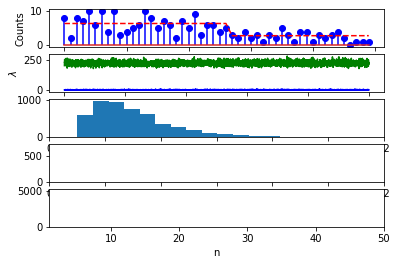

In [0]:
# make one big subplots and put everything in it.
f, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1)
# Plot the data
ax1.stem(range(N),x,linefmt='b-', markerfmt='bo',use_line_collection=True)
ax1.plot(range(N),lambdas,'r--')
ax1.set_ylabel('Counts')

ax2.plot(chain_lambda1,'b',chain_lambda2,'g')
ax2.set_ylabel('$\lambda$')

ax3.hist(chain_lambda1,20)
ax3.set_xlabel('$\lambda_1$')
ax3.set_xlim([0,12])

ax4.hist(chain_lambda2,20,color='g')
ax4.set_xlim([0,12])
ax4.set_xlabel('$\lambda_2$')

ax5.hist(chain_n,50)
ax5.set_xlabel('n')
ax5.set_xlim([1,50])

plt.show()

In [0]:
tt = np.random.multinomial(1,[1/5,2/5,1/10,1/10],size=1)

print(tt)
print('io', sum(tt[0]))

[[1 0 0 0]]
io 1


In [0]:
arr = np.array([11, 12, 13, 14, 15, 16, 17, 14, 11, 12, 14, 14, 16, 17])
result = np.where(arr == 15)
 
print('Tuple of arrays returned : ', result)
print("Elements with value 15 exists at following indices", result[0], sep='\n')
print(result[0][0])
print(arr[13:14])
print(arr[0:1])
print(arr[0:13])
print(arr[0:14])
arr.shape

Tuple of arrays returned :  (array([4]),)
Elements with value 15 exists at following indices
[4]
4
[17]
[11]
[11 12 13 14 15 16 17 14 11 12 14 14 16]
[11 12 13 14 15 16 17 14 11 12 14 14 16 17]


(14,)

In [0]:
range(20)
#ert = range(1,20+1)

#print(ert)


range(0, 20)

In [0]:
azers=[4]*12
azers[12:20]=[5]*(20-12)

print(np.array(azers[0:1]))
print(np.array(azers[0:1]).shape)

print(np.array(azers[1:12]))
print(np.array(azers[1:12]).shape)

print(np.array(azers[0:12]))
print(np.array(azers[0:12]).shape)

print(np.array(azers[0:13]))
print(np.array(azers[0:13]).shape)

print(np.array(azers[12:20]))
print(np.array(azers[12:20]).shape)

print(np.array(azers[11:20]))
print(np.array(azers[11:20]).shape)

print(np.array(azers[13:20]))
print(np.array(azers[13:20]).shape)

print(azers)
print(np.array(azers).shape)

[4]
(1,)
[4 4 4 4 4 4 4 4 4 4 4]
(11,)
[4 4 4 4 4 4 4 4 4 4 4 4]
(12,)
[4 4 4 4 4 4 4 4 4 4 4 4 5]
(13,)
[5 5 5 5 5 5 5 5]
(8,)
[4 5 5 5 5 5 5 5 5]
(9,)
[5 5 5 5 5 5 5]
(7,)
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5]
(20,)
